In [1]:
import os 
import requests 
import pandas as pd
from dotenv import load_dotenv 
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
my_btc = 1.2
my_eth = 5.3

In [4]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
import json
btc_data = requests.get(btc_url)

In [6]:
btc_data = btc_data.json()

In [7]:
print(json.dumps(btc_data, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18520450,
            "total_supply": 18520450,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11378.88,
                    "volume_24h": 15454580000,
                    "market_cap": 210780758524,
                    "percentage_change_1h": -0.102779074482078,
                    "percentage_change_24h": 0.13588525835227,
                    "percentage_change_7d": 0.8180951360412,
                    "percent_change_1h": -0.102779074482078,
                    "percent_change_24h": 0.13588525835227,
                    "percent_change_7d": 0.8180951360412
                },
                "CAD": {
                    "price": 15008.74272,
                    "volume_24h": 20384591020,
                    "marke

In [8]:
eth_data = requests.get(eth_url)

In [9]:
eth_data = eth_data.json()

In [10]:
print(json.dumps(eth_data, indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113052275,
            "total_supply": 113052275,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 368.64,
                    "volume_24h": 4197141876,
                    "market_cap": 41681479034,
                    "percentage_change_1h": -0.183477001327347,
                    "percentage_change_24h": 0.10738130066102,
                    "percentage_change_7d": -0.494286956816435,
                    "percent_change_1h": -0.183477001327347,
                    "percent_change_24h": 0.10738130066102,
                    "percent_change_7d": -0.494286956816435
                },
                "CAD": {
                    "price": 486.23616,
                    "volume_24h": 5536030134.444,
                    

In [11]:
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13654.66
The current value of your 5.3 ETH is $1953.79


In [12]:
my_spy = 50
my_agg = 200

In [13]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")

Alpaca Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [14]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [15]:
today = pd.Timestamp("2020-10-16", tz = "America/New_York").isoformat()
timeframe = "1D"
tickers = ["AGG","SPY"]
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [16]:
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

agg_value = my_agg * agg_price 
spy_value = my_spy * spy_price

print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")

The current value of your 200 AGG shares is $23576.00
The current value of your 50 SPY shares is $17362.50


In [17]:
monthly_income = 12000

total_crypto_value = my_btc_value + my_eth_value
total_share_value = agg_value + spy_value

amount = {"amount": [total_crypto_value, total_share_value]}
savings_tickers = ["crypto","shares"]

df_savings = pd.DataFrame(amount, index = savings_tickers)
df_savings

,amount
crypto,15608.448
shares,40938.500


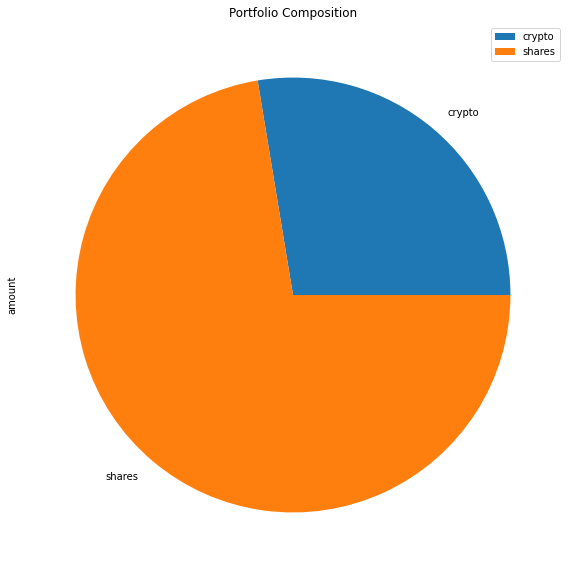

In [18]:
one = df_savings.plot.pie(y="amount", title = "Portfolio Composition", figsize=(20,10))
one.get_figure().savefig("pie.png",bbox_inches ="tight")

In [43]:
emergency_fund = monthly_income * 3

total_savings = total_crypto_value + total_share_value

if total_savings > emergency_fund:
    text = f"Congratulations! You have enough money in the emergency funds."
    print(text)
elif total_savings == emergency_fund:
    text_2 = f"Congratulations! You reached your savings goal."
    print(text_2)
else:
    amount_to_goal = emergency_fund - total_savings
    print(f"You need {amount_to_goal} dollars to reach your financial goal")

Congratulations! You have enough money in the emergency funds.


In [20]:
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df

df_tickers.tail()

AGG                                       \
                             open      high       low   close   volume   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.93  2770157   
2020-10-13 00:00:00-04:00  118.00  118.0600  117.9294  118.01  3101197   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.04  3292758   
2020-10-15 00:00:00-04:00  118.15  118.1500  117.9600  117.97  4977703   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.8800  117.88  3591541   

                              SPY                                      
                             open      high     low   close    volume  
2020-10-12 00:00:00-04:00  349.59  354.0200  349.06  352.43  61163344  
2020-10-13 00:00:00-04:00  352.16  352.4651  349.09  350.15  61479085  
2020-10-14 00:00:00-04:00  350.75  351.9300  347.14  347.97  47156216  
2020-10-15 00:00:00-04:00  343.71  348.0200  343.13  347.51  50609035  
2020-10-16 00:00:00-04:00  348.96  350.7500  347.10  347.25  62796942

In [21]:
MC_40_60_dist = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_40_60_dist.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [22]:
MC_40_60_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004371,1.001130,1.018477,0.992937,1.004721,0.998994,1.008894,1.010715,0.995157,0.999020,...,0.998131,0.994073,1.001023,1.001352,1.001909,0.994309,1.002059,0.989427,0.995619,1.015606
2,1.003691,0.998424,1.031805,1.001611,0.993752,0.997642,1.009131,1.012984,0.998738,1.006720,...,1.005603,0.998400,1.004088,1.010554,0.995780,0.990495,1.000702,0.980706,0.990317,1.014774
3,0.999080,1.000186,1.018715,0.994307,0.998311,1.009795,1.022136,1.014832,0.997015,1.007443,...,1.012952,0.997388,0.993059,1.018565,0.991499,0.988422,0.997095,0.971999,1.002791,1.019154
4,0.990562,0.990389,1.013047,0.994590,0.994205,1.009338,1.030661,1.014201,0.998080,1.008504,...,1.008891,1.003789,0.991512,1.014948,0.989609,0.988769,1.001781,0.964027,0.998953,1.009553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.758738,6.768992,4.357763,11.127181,7.155805,12.052814,2.994039,12.111149,8.138494,4.419269,...,10.230122,5.058989,8.663256,21.546960,5.283237,5.166956,5.476425,6.548816,16.071530,5.691189
7557,3.782896,6.791133,4.335894,11.226258,7.168213,12.201122,3.031604,12.125092,8.129631,4.418337,...,10.107104,5.043461,8.698793,21.732894,5.314050,5.205453,5.451420,6.562743,16.068250,5.659105
7558,3.758671,6.737942,4.390452,11.115238,7.198258,12.140767,3.022116,12.257627,8.189750,4.447036,...,10.052193,5.002076,8.748771,21.823082,5.332813,5.139116,5.411969,6.535545,16.057079,5.689766
7559,3.796638,6.751409,4.371247,11.077149,7.186742,12.219558,3.011655,12.138280,8.109010,4.462477,...,10.204018,5.013750,8.710303,22.004471,5.309348,5.164293,5.387943,6.531788,15.883747,5.666089


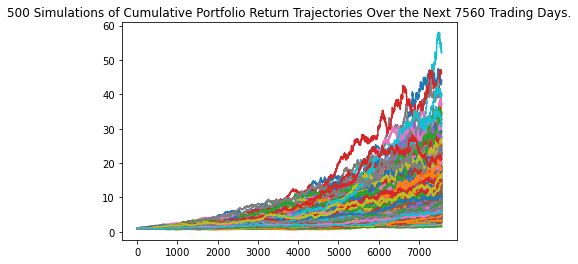

In [23]:
two = line_plot = MC_40_60_dist.plot_simulation()
two.get_figure().savefig("500_simulations.png",bbox_inches ="tight")

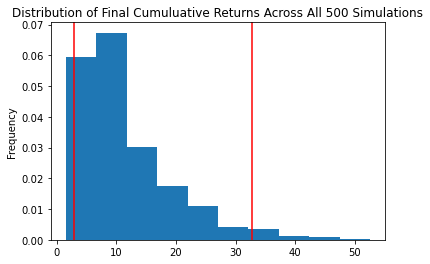

In [24]:
three = dist_plot = MC_40_60_dist.plot_distribution()
three.get_figure().savefig("dist.png",bbox_inches ="tight")

In [25]:
portfolio_tbl = MC_40_60_dist.summarize_cumulative_return()
print(portfolio_tbl)

count           500.000000
mean             11.462699
std               7.821929
min               1.499556
25%               5.849239
50%               9.182418
75%              14.862731
max              52.573684
95% CI Lower      2.956485
95% CI Upper     32.769542
Name: 7560, dtype: float64


In [26]:
initial_investment = 20000

ci_lower = round(portfolio_tbl[8]*initial_investment,2)
ci_upper = round(portfolio_tbl[9]*initial_investment,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59129.7 and $655390.83


In [27]:
initial_investment_50pct_increase = 20000 * 1.5

ci_lower_50pct_inc = round(portfolio_tbl[8]*initial_investment_50pct_increase,2)
ci_upper_50pct_inc = round(portfolio_tbl[9]*initial_investment_50pct_increase,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_50pct_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_50pct_inc} and ${ci_upper_50pct_inc}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88694.55 and $983086.25


In [28]:
MC_60_40_dist_5yrs = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_60_40_dist_5yrs.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [29]:
MC_60_40_dist_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994581,0.996844,1.000212,0.997450,1.003857,1.002458,1.006860,1.003812,1.005764,1.005575,...,1.000625,0.999196,1.004445,1.015534,1.003117,1.007346,1.008246,1.009140,0.994696,0.997420
2,1.007512,0.994785,0.999467,0.996499,0.994773,1.014234,0.999467,1.003804,1.006896,1.005687,...,0.999455,1.003125,0.999857,1.011198,0.995085,1.004687,0.998257,1.018445,0.998923,0.993363
3,1.005127,0.992140,1.001876,1.002339,0.986065,1.015514,1.001097,1.005368,1.010821,1.006104,...,0.996645,1.001871,1.003331,1.011687,1.006332,0.999540,1.004112,1.016989,0.994037,0.999170
4,1.002099,0.991918,1.008529,1.002241,0.993884,1.013446,1.002514,1.010839,1.015814,1.005473,...,0.998118,0.999423,1.007653,1.007095,0.999021,1.001104,1.003755,1.017148,0.996379,1.010803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.785541,1.478444,1.092183,1.273607,1.070095,0.949865,1.463616,1.195552,1.543735,1.207588,...,1.136342,1.028202,1.503379,1.303801,1.870687,1.412367,1.743569,1.192509,1.458840,0.996268
1257,0.785636,1.471521,1.077339,1.267873,1.049611,0.947474,1.474767,1.187175,1.545882,1.213180,...,1.135844,1.026246,1.497033,1.303239,1.879666,1.421681,1.749412,1.188647,1.455096,0.996409
1258,0.779337,1.471661,1.083481,1.263021,1.052709,0.942173,1.468162,1.182318,1.542902,1.211873,...,1.132194,1.023506,1.507139,1.298805,1.863413,1.420339,1.739046,1.181354,1.453375,1.000156
1259,0.784270,1.474505,1.080394,1.262457,1.060495,0.941136,1.464447,1.185506,1.547530,1.216054,...,1.131424,1.017261,1.505534,1.304082,1.843763,1.429222,1.734520,1.179793,1.458221,1.000458


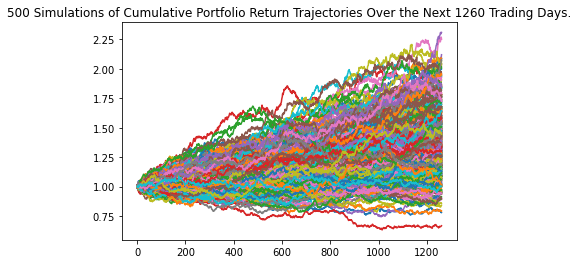

In [46]:
line_2_plot = MC_60_40_dist_5yrs.plot_simulation()
line_2_plot.get_figure().savefig("5_years_simulation.png", bbox_inches = "tight")

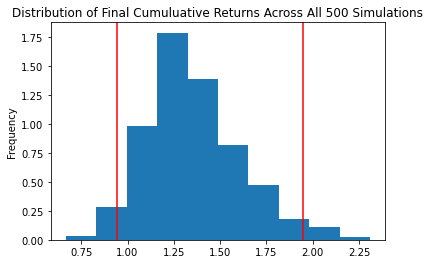

In [47]:
line_2_dist_plot = MC_60_40_dist_5yrs.plot_distribution()
line_2_dist_plot.get_figure().savefig("5_years_dist.png", bbox_inches = "tight")

In [32]:
portfolio_5yrs_tbl = MC_60_40_dist_5yrs.summarize_cumulative_return()
print(portfolio_5yrs_tbl)

count           500.000000
mean              1.353895
std               0.254252
min               0.666584
25%               1.179185
50%               1.318200
75%               1.494424
max               2.309585
95% CI Lower      0.945124
95% CI Upper      1.945077
Name: 1260, dtype: float64


In [45]:
ci_lower_5yrs = round(portfolio_5yrs_tbl[8]*initial_investment,2)
ci_upper_5yrs = round(portfolio_5yrs_tbl[9]*initial_investment,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18902.49 and $38901.53


In [44]:
ci_lower_5yrs_50pct_inc = round(portfolio_5yrs_tbl[8]*initial_investment_50pct_increase,2)
ci_upper_5yrs_50pct_inc = round(portfolio_5yrs_tbl[9]*initial_investment_50pct_increase,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_50pct_increase} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs_50pct_inc} and ${ci_upper_5yrs_50pct_inc}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $28353.73 and $58352.3


In [35]:
MC_50_50_dist_10yrs = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.50, .50],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_50_50_dist_10yrs.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [36]:
MC_50_50_dist_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999705,1.002012,1.005363,0.998347,1.002291,1.004687,1.002643,1.000320,1.000165,1.000716,...,0.992306,0.996839,1.005432,0.988630,0.998900,0.999811,0.997174,1.001413,1.003003,1.002354
2,0.991290,1.015551,1.013466,1.016819,1.004513,1.013769,1.011508,1.002382,1.004248,1.006436,...,0.999355,0.988111,1.013031,0.994290,1.002025,1.004369,0.999895,1.002998,1.000889,0.999240
3,0.985129,1.019048,1.013665,1.009296,0.999443,1.021941,0.997417,0.996265,0.991184,1.005498,...,0.995785,0.990585,1.021401,0.996928,0.999836,1.010221,0.987948,1.007805,1.005753,1.001480
4,0.979145,1.017521,1.019249,1.020324,1.002395,1.025140,1.001511,0.993731,0.984525,1.004879,...,0.996146,0.991861,1.019698,0.998724,0.992108,1.007840,0.982888,0.995564,0.998723,0.999399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.897798,1.736354,2.113553,1.529361,2.106723,2.211999,1.873491,3.451659,1.728683,3.050034,...,1.458995,1.632428,2.011092,1.798219,1.868437,3.081084,1.206546,1.640580,2.194934,2.151132
2517,1.893816,1.736890,2.130803,1.528042,2.120986,2.196343,1.857610,3.427825,1.702482,3.050012,...,1.463561,1.635766,2.012632,1.793292,1.863606,3.078838,1.216855,1.628944,2.194758,2.141691
2518,1.880694,1.747593,2.111828,1.536830,2.110687,2.195878,1.860812,3.466757,1.713710,3.009775,...,1.480947,1.636292,2.006228,1.796623,1.874600,3.114032,1.217644,1.637814,2.197960,2.161111
2519,1.856480,1.754929,2.103677,1.523066,2.108762,2.203631,1.866278,3.491028,1.714982,3.034315,...,1.478812,1.640682,2.004587,1.816978,1.868723,3.140311,1.230174,1.651859,2.186362,2.173392


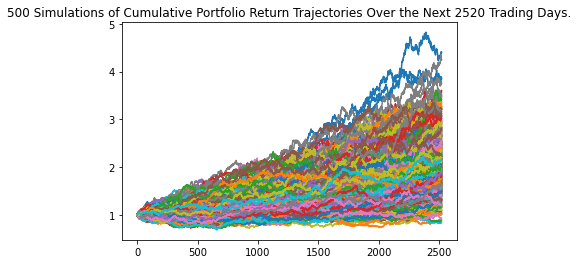

In [48]:
line_3_plot = MC_50_50_dist_10yrs.plot_simulation()
line_3_plot.get_figure().savefig("10_years_simulation.png", bbox_inches = "tight")

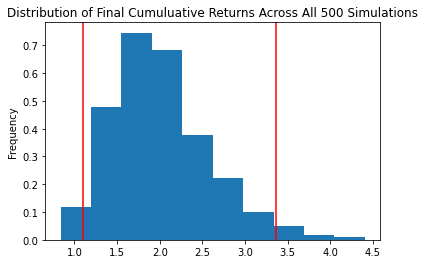

In [38]:
line_3_dist_plot = MC_50_50_dist_10yrs.plot_distribution()
line_3_dist.get_figure().savefig("10_years_dist.png", bbox_inches = "tight")

In [39]:
portfolio_10yrs_tbl = MC_50_50_dist_10yrs.summarize_cumulative_return()
print(portfolio_10yrs_tbl)

count           500.000000
mean              2.012235
std               0.575610
min               0.836380
25%               1.610135
50%               1.932051
75%               2.326907
max               4.404150
95% CI Lower      1.103692
95% CI Upper      3.360976
Name: 2520, dtype: float64


In [40]:
ci_lower_10yrs = round(portfolio_10yrs_tbl[8]*initial_investment,2)
ci_upper_10yrs = round(portfolio_10yrs_tbl[9]*initial_investment,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_10yrs} and ${ci_upper_10yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22073.85 and $67219.51


In [41]:
ci_lower_10yrs_50pct_inc = round(portfolio_10yrs_tbl[8]*initial_investment_50pct_increase,2)
ci_upper_10yrs_50pct_inc = round(portfolio_10yrs_tbl[9]*initial_investment_50pct_increase,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_50pct_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_10yrs_50pct_inc} and ${ci_upper_10yrs_50pct_inc}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33110.77 and $100829.27
